<IPython.core.display.Javascript object>


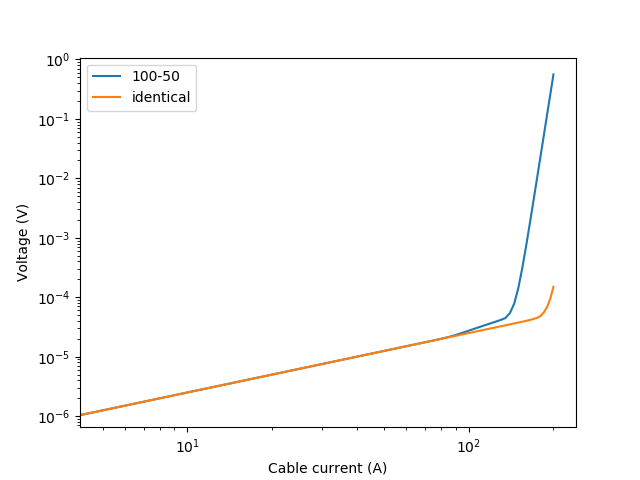

In [29]:
import subprocess
import tempfile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook


Ncases = 2 #Number of cases
labels = ['100-50','identical']
for i in range(Ncases):
    out = subprocess.run(['ngspice', '-b', f'Test{i+1}.cir'], 
    stdout=subprocess.PIPE,  stderr=subprocess.PIPE)
    #print(out)
    in_data = False
    count_dash_line = 0
    data = []
    for line in out.stdout.decode('ascii').split('\n'):
        if in_data:
            if line.strip() == '':
                break
            tmp = [float(x) for x in line.split()]
            data.append(tmp)

        if '----' in line:
            count_dash_line += 1
        if count_dash_line == 2 and not in_data:
            in_data = True

    #print(data)
    data =np.asarray(data)
    Icable = data[:,1]
    Vt =  data[:,2] + data[:,4]
    plt.loglog(Icable,Vt,label = labels[i])
plt.xlabel('Cable current (A)')
plt.ylabel('Voltage (V)')
plt.legend()

In [ ]:
out = subprocess.run(['ngspice', '-b', 'Test1.cir'], 
stdout=subprocess.PIPE,  stderr=subprocess.PIPE)
#print(out)
in_data = False
count_dash_line = 0
data = []
for line in out.stdout.decode('ascii').split('\n'):
    if in_data:
        if line.strip() == '':
            break
        tmp = [float(x) for x in line.split()]
        data.append(tmp)
        
    if '----' in line:
        count_dash_line += 1
    if count_dash_line == 2 and not in_data:
        in_data = True
        
print(data)
data =np.asarray(data)
plt.plot(data[:,1], data[:,2])
plt.plot(data[:,1], data[:,3])